In [25]:
import numpy as np 

# np.random.seed()
for i,j in zip(np.random.choice(['tyb','dyk','lsj','ly','syc'],5,replace=False).tolist()*3,range(13)):
    print(i,j)

dyk 0
lsj 1
ly 2
syc 3
tyb 4
dyk 5
lsj 6
ly 7
syc 8
tyb 9
dyk 10
lsj 11
ly 12


In [1]:
import torch 

x = torch.load('/remote-home/share/lisj/Workspace/ORMIL/datasets/CAMELYON17/feature/000.pt',weights_only=False)
x

{'bag_feats': tensor([[ 0.6211, -0.9390,  0.1818,  ..., -0.0059, -0.9434, -3.1816],
         [ 1.0137, -0.8423,  0.6572,  ..., -0.8286, -0.7500, -3.4453],
         [ 0.5864,  0.0671, -0.8701,  ..., -2.4824, -0.3513, -1.7451],
         ...,
         [ 0.5317,  0.6572, -1.2266,  ..., -1.2490,  1.0342, -0.3694],
         [ 3.5371,  0.5674,  0.5273,  ..., -1.0850,  0.5132,  1.5352],
         [ 0.7114, -0.0093,  0.3342,  ..., -1.6787,  0.8208,  0.9209]],
        dtype=torch.float16),
 'coords': tensor([[  7168,   4480],
         [  7616,   4480],
         [ 27776,  81088],
         ...,
         [146944,  42112],
         [146944,  47488],
         [146944,  47936]], dtype=torch.int32)}

In [2]:
import torch

# ① 读文件（已经做过，可省略）
x = torch.load('/remote-home/share/lisj/Workspace/SOTA_NAS/datasets/core/MUSK-feature/1819360.pt',
               map_location='cpu')   # 建议总是 map 到 CPU

bag_feats = x['bag_feats']           # (N, 1024) 的 Float16 张量

# ② 关闭截断，设置阈值为无穷大
torch.set_printoptions(threshold=float('inf'),  # 不截断
                       linewidth=180,           # 每行最多字符，防止自动换行过窄
                       sci_mode=False)          # 关掉科学计数法（可选）

# ③ 打印第一行（第 0 条 patch 的 1024 维特征）
print(bag_feats[0])                # 这时会把 1024 个值全部显示出来

# ④ 如果后面想恢复默认打印格式：
torch.set_printoptions(profile='default')


tensor([    -0.0267,     -0.0053,     -0.0062,     -0.0014,      0.0013,      0.0147,      0.0018,     -0.0066,     -0.0638,      0.0130,     -0.0533,     -0.0223,      0.0158,
            -0.0205,     -0.0022,      0.0068,      0.0201,      0.0110,      0.0157,      0.0055,      0.0366,     -0.0072,      0.0275,     -0.0137,     -0.1024,     -0.0007,
            -0.0130,      0.0075,     -0.0061,     -0.0615,     -0.0034,      0.0170,     -0.0170,      0.0228,      0.0157,      0.0381,     -0.0095,      0.0182,     -0.0255,
             0.0193,     -0.0093,      0.0155,      0.0009,      0.0102,     -0.0039,      0.0222,      0.0044,      0.0266,      0.0371,      0.0364,      0.0085,     -0.0152,
             0.0253,      0.0086,     -0.0031,     -0.0247,     -0.0053,     -0.0041,     -0.0109,      0.0289,     -0.0080,      0.0069,      0.0270,     -0.0168,     -0.0068,
             0.0188,      0.0236,     -0.0344,      0.0136,     -0.0034,      0.0116,      0.0044,     -0.0487,    

/tmp/ipykernel_827379/1576924498.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x = torch.load('/remote-home/share/lisj/Workspace/SOTA_NAS/datasets/core/MUSK-feature/18

In [9]:
import torch

# 设置 PyTorch 的打印选项以显示完整内容
# 方法1: 使用 profile="full"
torch.set_printoptions(profile="full")

# 或者，方法2: 设置一个足够大的阈值 (threshold)
# 假设您的张量元素数量少于 10000 (对于 (1, 1024) 维度，1024 个元素是足够的)
# torch.set_printoptions(threshold=10000) # 您也可以用 float('inf') 表示无穷大

# 加载您的张量
# weights_only=False 是 torch.load 的默认行为（在旧版本中），
# 对于您自己保存的文件是安全的。
# 如果是从不可信来源加载，建议使用 weights_only=True (如果适用) 或仔细检查。
try:
    x = torch.load('/remote-home/share/lisj/Workspace/SOTA_NAS/datasets/core/MUSK-MIL-feature/final_image_feature.pt', weights_only=False)

    # 现在打印张量 x，它将会完整显示
    print(x)

except FileNotFoundError:
    print(f"错误: 文件未找到 /remote-home/share/lisj/Workspace/SOTA_NAS/datasets/core/MUSK-MIL-feature/final_image_feature.pt")
except Exception as e:
    print(f"加载或打印时发生错误: {e}")


# 可选：如果您希望在脚本的后续部分恢复默认的打印行为（即省略长张量）
# torch.set_printoptions(profile="default")

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0805, 0.0000, 0.0000, 0.0645,
         0.0000, 0.0711, 0.0625, 0.0000, 0.0160, 0.0502, 0.0953, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0421, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0304, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0568, 0.0000, 0.0203, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0225, 0.0000, 0.0000, 0.0118,
         0.0797, 0.0000, 0.0000, 0.0810, 0.0000, 0.0000, 0.0000, 0.0277, 0.0000,
         0.0278, 0.1049, 0.0000, 0.0160, 0.0000, 0.0000, 0.0000, 0.0000, 0.0537,
         0.0060, 0.0000, 0.0000, 0.0000, 0.0000, 0.0113, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0214, 0.0000, 0.0025, 0.0000,
         0.0138, 0.0000, 0.0000, 0.0000, 0.0887, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0945, 0.0000, 0.0096, 0.0000, 0.0000, 0.0000, 0.0000, 0.0756, 0.0300,
         0.0379, 0.0000, 0.0

In [21]:
torch.stack([x[i] for i in x],dim=0)

tensor([[ 0.6580,  0.0728, -0.8551,  ..., -0.6103,  0.1014, -0.2686],
        [ 0.8339,  0.0563, -1.2115,  ..., -0.6015,  0.6248, -0.4661],
        [ 0.5998, -0.1411, -0.9968,  ..., -0.6979,  0.3860, -0.0752],
        ...,
        [ 0.8073,  0.0390, -1.0395,  ..., -0.6395,  0.2888, -0.2223],
        [ 0.8500,  0.0337, -1.1395,  ..., -0.6027,  0.4402, -0.3367],
        [ 0.7915,  0.0484, -1.3786,  ..., -0.4991,  0.1976, -0.5903]])

In [1]:
import torch 
import torch.nn as nn 
import numpy as np 

In [4]:
l = []
num_class = 4
sigmas = [0.1,0.2,0.3,0.4,0.5,0.75,1,1.25,1.5]
# for i in range(num_class):
#     bag_label = torch.tensor([i])
#     sigma = torch.tensor(1)
#     a = torch.softmax(-torch.square(bag_label.repeat(num_class)-torch.arange(num_class)).float() / sigma,dim=0)
#     l.append(a.numpy())

for i in range(len(sigmas)):
    bag_label = torch.tensor([2])
    sigma = torch.tensor(sigmas[i])
    a = torch.softmax(-torch.square(bag_label.repeat(num_class)-torch.arange(num_class)).float() / sigma,dim=0)
    l.append(a.numpy())

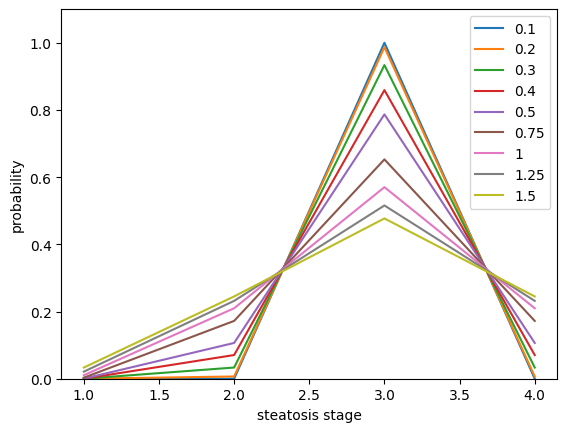

In [7]:
import matplotlib.pyplot as plt

# 美学评分
x = [1, 2, 3, 4]

# 各类别在不同评分下的频率（根据图像估计）
unacceptable = l[0]
flawed = l[1]
ordinary = l[2]
professional = l[3]
# exceptional = [0.01, 0.03, 0.10, 0.20, 0.65]

for i in range(len(sigmas)):
    plt.plot(x, l[i],label=str(sigmas[i]))
# 绘制折线图
# plt.plot(x, unacceptable, label='normal')
# plt.plot(x, flawed, label='mild')
# plt.plot(x, ordinary, label='moderate')
# plt.plot(x, professional, label='severe')
# plt.plot(x, exceptional, label='exceptional')

# 添加图例、标签
plt.xlabel('steatosis stage')
plt.ylabel('probability')
plt.ylim(0, 1.1)
plt.legend()

In [168]:
# y_true = torch.tensor([1]).repeat(8)
# y_ordinal = torch.arange(8)

bag_label = torch.tensor([2], dtype=torch.float32)
# y = torch.tensor([])
# s = torch.exp(-torch.square(y_true-y_ordinal))
y_true = torch.softmax(-torch.square(bag_label.repeat(4)-torch.arange(4)).float(),dim=0)

kl_loss = nn.KLDivLoss(reduction="batchmean")

y_pred = torch.log_softmax(torch.randn(1, 4, requires_grad=True), dim=1)
# y_pred = torch.randn(1, 4, requires_grad=True)

kl_loss(y_pred, y_true), y_pred.softmax(dim=1),y_true
# y = s / s.sum()
# y
# -torch.square(y_true-y_ordinal)
np.argmax(y_pred.detach().numpy())

2

In [1]:
import torch
import numpy as np
import torch.nn as nn
# import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd 

In [3]:
from models.diffattention.multihead_flashdiff import MultiheadFlashDiff
import torch
import torch.nn as nn
from einops import repeat

class NASCSingle(nn.Module):
    def __init__(self,
        input_dim=384,
        num_class=3,
        embed_dim=384,
        depth=3, # current layer index
        diff_num_heads=8,
        diff_num_kv_heads=None,
        dropout=0.0
        ):
        super().__init__()
        
        self.input_fc = nn.Sequential(nn.Linear(input_dim,embed_dim),nn.GELU())
        self.cls_token = nn.Parameter(torch.randn(1,input_dim))
        self.cls_token.requires_grad_(True)
        self.layers = nn.ModuleList()
        for i in range(depth):
            self.layers.append(nn.Sequential(nn.LayerNorm(embed_dim),
                                            MultiheadFlashDiff(embed_dim,i+1,diff_num_heads,diff_num_kv_heads),
                                            nn.Dropout(dropout)))
        self.output_fc = nn.Sequential(nn.LayerNorm(embed_dim),nn.Linear(embed_dim, num_class))
        
        self._cos_cached = None
        self._sin_cached = None
        
    # def _update_cos_sin_tables(self, coords):
    #     seq_len = coords.max().item()
    #     if seq_len > self.max_coords:
    #         self.max_coords = seq_len
    #         t = torch.arange(self.max_coords + 1).to(
    #             coords
    #         )  # Arange(max) returns [0,..., max-1], we need [0,..., max]
    #         if self.freqs_for == "pixel":
    #             t = t / self.max_freq
    #         freqs = torch.einsum("i,j->ij", t, self.inv_freq)
    #         emb = torch.repeat_interleave(freqs, 2, -1)
    #         self._cos_cached = emb.cos()  # (seq_len, n_dim/2)
    #         self._sin_cached = emb.sin()  # (seq_len, n_dim/2)

    #     return self._cos_cached, self._sin_cached
    
    def forward(self, feats: torch.Tensor):
        """
        Args:
            features (torch.Tensor): (..., T, dim)
            coords (torch.Tensor): (... T, 2)
        """       
        # self._cos_cached, self._sin_cached = self._update_cos_sin_tables(coords)
        bs,_,_ = feats.shape
        print(feats.shape)
        cls_token_in = repeat(self.cls_token,'n d -> b n d', b=bs)
        print(cls_token_in.shape)
        h = torch.concat([cls_token_in,feats],dim=1)
        print(h.shape)
        h = self.input_fc(h)  # [b,n,d]
        for layer in self.layers:
            h_ = h
            h = layer[0](h)
            h = layer[1](h)
            h = layer[2](h)
            h = h + h_
        # h_ = h
        # h_ = self.layers(h_)
        # h = h + h_
        cls_token_out = h[:, 0]
        y_hat = self.output_fc(cls_token_out)
        return y_hat

In [6]:
model = NASCSingle().half()
model(torch.randn(1,1000,384).half())

torch.Size([1, 1000, 384])
torch.Size([1, 1, 384])
torch.Size([1, 1001, 384])


NotImplementedError: Could not run 'flash_attn::_flash_attn_forward' with arguments from the 'CPU' backend. This could be because the operator doesn't exist for this backend, or was omitted during the selective/custom build process (if using custom build). If you are a Facebook employee using PyTorch on mobile, please visit https://fburl.com/ptmfixes for possible resolutions. 'flash_attn::_flash_attn_forward' is only available for these backends: [CUDA, Meta, BackendSelect, Python, FuncTorchDynamicLayerBackMode, Functionalize, Named, Conjugate, Negative, ZeroTensor, ADInplaceOrView, AutogradOther, AutogradCPU, AutogradCUDA, AutogradHIP, AutogradXLA, AutogradMPS, AutogradIPU, AutogradXPU, AutogradHPU, AutogradVE, AutogradLazy, AutogradMTIA, AutogradPrivateUse1, AutogradPrivateUse2, AutogradPrivateUse3, AutogradMeta, AutogradNestedTensor, Tracer, AutocastCPU, AutocastXPU, AutocastMPS, AutocastCUDA, FuncTorchBatched, BatchedNestedTensor, FuncTorchVmapMode, Batched, VmapMode, FuncTorchGradWrapper, PythonTLSSnapshot, FuncTorchDynamicLayerFrontMode, PreDispatch, PythonDispatcher].

CUDA: registered at /dev/null:185 [kernel]
Meta: registered at /dev/null:184 [kernel]
BackendSelect: fallthrough registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/core/BackendSelectFallbackKernel.cpp:3 [backend fallback]
Python: registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/core/PythonFallbackKernel.cpp:153 [backend fallback]
FuncTorchDynamicLayerBackMode: registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/functorch/DynamicLayer.cpp:497 [backend fallback]
Functionalize: registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/FunctionalizeFallbackKernel.cpp:349 [backend fallback]
Named: registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/core/NamedRegistrations.cpp:7 [backend fallback]
Conjugate: registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/ConjugateFallback.cpp:17 [backend fallback]
Negative: registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/native/NegateFallback.cpp:18 [backend fallback]
ZeroTensor: registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/ZeroTensorFallback.cpp:86 [backend fallback]
ADInplaceOrView: fallthrough registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/core/VariableFallbackKernel.cpp:96 [backend fallback]
AutogradOther: registered at /dev/null:185 [autograd kernel]
AutogradCPU: registered at /dev/null:185 [autograd kernel]
AutogradCUDA: registered at /dev/null:185 [autograd kernel]
AutogradHIP: registered at /dev/null:185 [autograd kernel]
AutogradXLA: registered at /dev/null:185 [autograd kernel]
AutogradMPS: registered at /dev/null:185 [autograd kernel]
AutogradIPU: registered at /dev/null:185 [autograd kernel]
AutogradXPU: registered at /dev/null:185 [autograd kernel]
AutogradHPU: registered at /dev/null:185 [autograd kernel]
AutogradVE: registered at /dev/null:185 [autograd kernel]
AutogradLazy: registered at /dev/null:185 [autograd kernel]
AutogradMTIA: registered at /dev/null:185 [autograd kernel]
AutogradPrivateUse1: registered at /dev/null:185 [autograd kernel]
AutogradPrivateUse2: registered at /dev/null:185 [autograd kernel]
AutogradPrivateUse3: registered at /dev/null:185 [autograd kernel]
AutogradMeta: registered at /dev/null:185 [autograd kernel]
AutogradNestedTensor: registered at /dev/null:185 [autograd kernel]
Tracer: registered at /opt/conda/conda-bld/pytorch_1729647350383/work/torch/csrc/autograd/TraceTypeManual.cpp:294 [backend fallback]
AutocastCPU: fallthrough registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/autocast_mode.cpp:321 [backend fallback]
AutocastXPU: fallthrough registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/autocast_mode.cpp:463 [backend fallback]
AutocastMPS: fallthrough registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/autocast_mode.cpp:209 [backend fallback]
AutocastCUDA: fallthrough registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/autocast_mode.cpp:165 [backend fallback]
FuncTorchBatched: registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/functorch/LegacyBatchingRegistrations.cpp:731 [backend fallback]
BatchedNestedTensor: registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/functorch/LegacyBatchingRegistrations.cpp:758 [backend fallback]
FuncTorchVmapMode: fallthrough registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/functorch/VmapModeRegistrations.cpp:27 [backend fallback]
Batched: registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/LegacyBatchingRegistrations.cpp:1075 [backend fallback]
VmapMode: fallthrough registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/VmapModeRegistrations.cpp:33 [backend fallback]
FuncTorchGradWrapper: registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/functorch/TensorWrapper.cpp:207 [backend fallback]
PythonTLSSnapshot: registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/core/PythonFallbackKernel.cpp:161 [backend fallback]
FuncTorchDynamicLayerFrontMode: registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/functorch/DynamicLayer.cpp:493 [backend fallback]
PreDispatch: registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/core/PythonFallbackKernel.cpp:165 [backend fallback]
PythonDispatcher: registered at /opt/conda/conda-bld/pytorch_1729647350383/work/aten/src/ATen/core/PythonFallbackKernel.cpp:157 [backend fallback]


In [92]:
# torch.sigmoid(torch.tensor([torch.inf,-8,0,8,torch.inf])) - torch.sigmoid(torch.tensor(-8))
import torch 
b = (torch.tensor([-1,0,1]) - 0.5)*8
cdf_pred_seq  = torch.sigmoid(torch.concat([torch.tensor([-torch.inf]), b, torch.tensor([torch.inf])],dim=0))
(cdf_pred_seq [1:] - cdf_pred_seq [:-1])

tensor([6.1442e-06, 1.7980e-02, 9.6403e-01, 1.7986e-02])

In [7]:
output_class = 4
b = []
for i in range(1,output_class):
    b_i = torch.log(torch.tensor(1/(output_class/i-1)))
    b.append(b_i)
print(b)

[tensor(-1.0986), tensor(0.), tensor(1.0986)]


In [71]:
torch.load('./datasets/core/UNI-feature/1819360.pt')['bag_feats'].shape

/tmp/ipykernel_2526400/32127988.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load('./datasets/core/UNI-feature/1819360.pt')['bag_feats'].shape


torch.Size([16402, 384])

In [2]:
output_class = 4
b_1 = torch.randn(1,dtype=torch.float32)
a = torch.randn(output_class-2,dtype=torch.float32)
B = nn.Parameter(torch.concat([b_1,torch.cumsum(a**2,dim=0)+b_1],dim=0))

up_boundary = nn.Parameter(torch.tensor([torch.inf], dtype=torch.float32))
up_boundary.requires_grad_(False)
bottom_boundary = nn.Parameter(torch.tensor([-torch.inf], dtype=torch.float32))
bottom_boundary.requires_grad_(False)

Parameter containing:
tensor([-inf])

In [73]:
from glob import glob 
import os 
from tqdm import tqdm

In [74]:
for i in tqdm(glob('./datasets/core/CONCH-feature/*.csv')):
    idx = i.split(os.sep)[-1].split('.')[0]
    df = pd.read_csv(i,index_col=0)
    df = df.drop(df[df.index=='thumbnail'].index)
    df = df.drop_duplicates()
    bag_feats = df.interpolate(method="linear").to_numpy()
    bag_feats = torch.tensor(bag_feats,dtype=torch.float32)
    bag_feats = torch.unique(bag_feats, dim=0)
    coords = torch.tensor([list(eval(df.index[i])) for i in range(len(df.index))])
    torch.save({'bag_feats':bag_feats,'coords':coords},f'./datasets/core/CONCH-feature/{idx}.pt')
    # os.remove(i)

100%|██████████| 560/560 [10:59<00:00,  1.18s/it]


In [84]:
for i in glob('./datasets/core/UNI-feature/*.pt'):
    print(i.split(os.sep)[-1],torch.load(i, weights_only=False)['bag_feats'].shape)
    # break

1900690.pt torch.Size([12291, 384])
1913272.pt torch.Size([9254, 384])
1923787.pt torch.Size([9200, 384])
1900691.pt torch.Size([11392, 384])
1921403.pt torch.Size([14828, 384])
1918014.pt torch.Size([12156, 384])
1823923.pt torch.Size([8576, 384])
1824644.pt torch.Size([8635, 384])
1927333.pt torch.Size([2584, 384])
1923861.pt torch.Size([9251, 384])
1918396.pt torch.Size([8251, 384])
1923211.pt torch.Size([9240, 384])
1920042.pt torch.Size([9014, 384])
1906548.pt torch.Size([8256, 384])
1925160.pt torch.Size([5641, 384])
1912265.pt torch.Size([6041, 384])
1826920.pt torch.Size([22845, 384])
1927977.pt torch.Size([14736, 384])
1914750.pt torch.Size([9839, 384])
1904220.pt torch.Size([12195, 384])
1920529.pt torch.Size([13399, 384])
1827487.pt torch.Size([6439, 384])
1928251.pt torch.Size([8307, 384])
1905092.pt torch.Size([17402, 384])
1916897.pt torch.Size([16147, 384])
1906083.pt torch.Size([5830, 384])
1916942.pt torch.Size([8862, 384])
1928800.pt torch.Size([13349, 384])
1924566.p

In [3]:
B = torch.concat([bottom_boundary,B,up_boundary],dim=0)
cdf = torch.sigmoid(B)
cdf

tensor([0.0000, 0.8663, 0.9966, 0.9996, 1.0000], grad_fn=<SigmoidBackward0>)

In [51]:
print(cdf[1:],cdf[:-1],cdf[1:] - cdf[:-1])

tensor([0.4173, 0.9642, 0.9816, 1.0000], grad_fn=<SliceBackward0>) tensor([0.0000, 0.4173, 0.9642, 0.9816], grad_fn=<SliceBackward0>) tensor([0.4173, 0.5470, 0.0174, 0.0184], grad_fn=<SubBackward0>)


/root/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

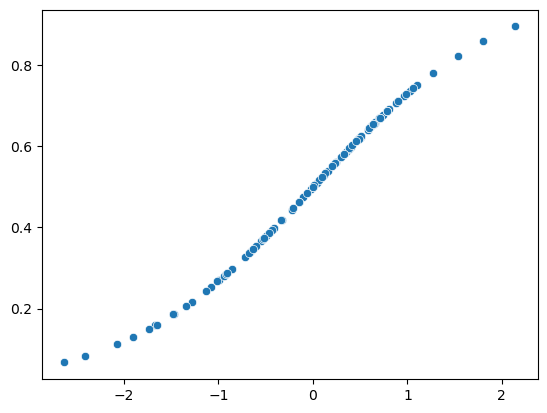

In [24]:
x = torch.randn(1,100)
y = torch.sigmoid(x)
sns.scatterplot(x.squeeze(0).numpy(), y.squeeze(0).numpy())

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans
import seaborn as sns

In [26]:
df = pd.read_csv("datasets/UNI-feature/1819360.csv", index_col=0)
x = np.unique(df.to_numpy(), axis=0)
n_clusters = 32
kmeans = MiniBatchKMeans(n_clusters=n_clusters).fit(x)
l = kmeans.labels_
cluster_numbers = {}
for k in range(n_clusters):
    v = l[l == k].size
    cluster_numbers[k] = v
print(cluster_numbers)

{0: 723, 1: 191, 2: 921, 3: 219, 4: 1017, 5: 742, 6: 1596, 7: 355, 8: 227, 9: 139, 10: 1961, 11: 152, 12: 249, 13: 341, 14: 1335, 15: 230, 16: 356, 17: 220, 18: 205, 19: 444, 20: 223, 21: 733, 22: 1181, 23: 170, 24: 212, 25: 292, 26: 943, 27: 247, 28: 138, 29: 98, 30: 317, 31: 225}


In [115]:
np.random.uniform() > 0.5

False

In [79]:
ratio = np.random.randint(1, 100, 1) * 0.01
new_sample = []
for c in range(n_clusters):
    cluster_sample = x[l==c]
    sample_n = int(np.ceil(cluster_sample.shape[0]*ratio))
    slice = np.random.choice(range(len(cluster_sample)), sample_n)
    # print()
    new_sample.extend(cluster_sample[slice])
    # break
np.array(new_sample).shape

/tmp/ipykernel_2950895/4156345531.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sample_n = int(np.ceil(cluster_sample.shape[0]*ratio))


(5103, 384)

In [76]:
cri = torch.nn.NLLLoss()
y_hat, y = torch.softmax(torch.randn(1,4),dim = 1), torch.tensor([2]).long()
y_hat = torch.log(y_hat)
cri(y_hat, y)

tensor(3.2250)

In [ ]:
import torch

# 加载检查点
checkpoint_path = "./encoder/ckpt/pytorch_model.bin"
state_dict = torch.load(checkpoint_path, map_location="cpu")

# 打印所有键
print("Checkpoint Keys:")
for key in state_dict.keys():
    print(key)


: 

In [54]:
log_likelihood = torch.log(y_hat)
-torch.gather(log_likelihood, 1, y)

RuntimeError: Index tensor must have the same number of dimensions as input tensor

In [ ]:
0.7777777777777778,0.9311974586933685,0.8617894849098859,
0.8148148148148148,0.9532516040263189,0.8961937716262975,
0.8148148148148148,0.9533552626209885,0.9010173219686555,
0.8333333333333334,0.9597983213719073,0.892,
0.8130841121495327,0.9505897337831449,0.8688082393330063,

In [1]:
import torch 

In [37]:
B = 2
logits = torch.randn(2, 1000, 4)
m = logits.view(B, -1).argmax(1)
top_indices = torch.cat(((m // 4).view(B, -1), (m % 4).view(B, -1)), dim=1)
# top_instance = logits[:,top_indices[:,0,:],:]
# top_indices[:,0,:]
torch.index_select(logits, dim=1, index=top_indices[:,0])

tensor([[[ 0.3016, -0.6008, -1.1098,  3.3987],
         [ 0.0177, -0.8320,  0.4943,  0.3485]],

        [[ 0.9523,  1.0510, -2.4366,  0.0082],
         [ 0.5122,  3.4808, -0.2541,  0.3757]]])

In [49]:
Y_prob = []
for s in range(B):
    Y_prob.append(logits[s,top_indices[s,0]])
Y_prob = torch.stack(Y_prob,dim=0)
Y_prob

tensor([[ 0.3016, -0.6008, -1.1098,  3.3987],
        [ 0.5122,  3.4808, -0.2541,  0.3757]])

In [10]:
from models.patchgcn import PatchGCN_Surv
import torch 

model = PatchGCN_Surv(num_features=384,n_classes=4)


In [8]:
data = torch.load('./datasets/core/graph/UNI/1819360.pt',weights_only=False)
model(data)

(tensor([[0.5367, 0.5169, 0.5282, 0.5157]], grad_fn=<SigmoidBackward0>),
 tensor([[0.4633, 0.2238, 0.1056, 0.0511]], grad_fn=<CumprodBackward0>),
 tensor([[0]]),
 tensor([[-0.0701, -0.0598,  0.0382,  ..., -0.0647, -0.0058,  0.0727]],
        grad_fn=<TransposeBackward0>),
 None)

In [3]:
import re 

def process_yaml_file(input_path, output_path):
    with open(input_path, 'r') as input_file:
        lines = input_file.readlines()
    
    processed_lines = []
    for line in lines:
        # 处理以"- "开头且包含两个等号的行
        processed_line = re.sub(
            r'^(\s*-\s*[^=]+=[^=]+)=.*',
            r'\1',
            line.rstrip('\n'))
        processed_lines.append(processed_line + '\n')
    
    with open(output_path, 'w') as output_file:
        output_file.writelines(processed_lines)

# 使用示例
input_file = '/remote-home/share/lisj/Workspace/SOTA_NAS/Patch-GCN-master/docs/requirements.yaml'
output_file = '/remote-home/share/lisj/Workspace/SOTA_NAS/Patch-GCN-master/docs/requirements.yaml'
process_yaml_file(input_file, output_file)

In [1]:
import torch
from torch_sparse import SparseTensor

indices = torch.tensor([[0, 1], [1, 0]], dtype=torch.long)
values = torch.tensor([1., 2.])
shape = (2, 2)
sparse_tensor = SparseTensor(row=indices[0], col=indices[1], value=values, sparse_sizes=shape)

print(sparse_tensor.to_dense())  # 应输出 tensor([[0., 2.], [1., 0.]])

tensor([[0., 1.],
        [2., 0.]])


In [14]:
from torch import Tensor
from torch_sparse import SparseTensor, cat
import torch_geometric
from torch_geometric.data import Data

class BatchWSI(torch_geometric.data.Batch):
    def __init__(self):
        super(BatchWSI, self).__init__()
        pass
    
    @classmethod
    def from_data_list(cls, data_list, follow_batch=[], exclude_keys=[], update_cat_dims={}):
            r"""Constructs a batch object from a python list holding
            :class:`torch_geometric.data.Data` objects.
            The assignment vector :obj:`batch` is created on the fly.
            Additionally, creates assignment batch vectors for each key in
            :obj:`follow_batch`.
            Will exclude any keys given in :obj:`exclude_keys`."""

            keys = list(set(data_list[0].keys()) - set(exclude_keys))
            assert 'batch' not in keys and 'ptr' not in keys

            batch = cls()
            for key in data_list[0].__dict__.keys():
                if key[:2] != '__' and key[-2:] != '__':
                    batch[key] = None

            batch.__num_graphs__ = len(data_list)
            batch.__data_class__ = data_list[0].__class__
            for key in keys + ['batch']:
                batch[key] = []
            batch['ptr'] = [0]
            cat_dims = {}
            device = None
            slices = {key: [0] for key in keys}
            cumsum = {key: [0] for key in keys}
            num_nodes_list = []
            for i, data in enumerate(data_list):
                for key in keys:
                    item = data[key]

                    # Increase values by `cumsum` value.
                    cum = cumsum[key][-1]
                    if isinstance(item, Tensor) and item.dtype != torch.bool:
                        if not isinstance(cum, int) or cum != 0:
                            item = item + cum
                    elif isinstance(item, SparseTensor):
                        value = item.storage.value()
                        if value is not None and value.dtype != torch.bool:
                            if not isinstance(cum, int) or cum != 0:
                                value = value + cum
                            item = item.set_value(value, layout='coo')
                    elif isinstance(item, (int, float)):
                        item = item + cum

                    # Gather the size of the `cat` dimension.
                    size = 1
                    
                    if key in update_cat_dims.keys():
                        cat_dim = update_cat_dims[key]
                    else:
                        cat_dim = data.__cat_dim__(key, data[key])
                        # 0-dimensional tensors have no dimension along which to
                        # concatenate, so we set `cat_dim` to `None`.
                        if isinstance(item, Tensor) and item.dim() == 0:
                            cat_dim = None
                    
                    cat_dims[key] = cat_dim

                    # Add a batch dimension to items whose `cat_dim` is `None`:
                    if isinstance(item, Tensor) and cat_dim is None:
                        cat_dim = 0  # Concatenate along this new batch dimension.
                        item = item.unsqueeze(0)
                        device = item.device
                    elif isinstance(item, Tensor):
                        size = item.size(cat_dim)
                        device = item.device
                    elif isinstance(item, SparseTensor):
                        size = torch.tensor(item.sizes())[torch.tensor(cat_dim)]
                        device = item.device()

                    batch[key].append(item)  # Append item to the attribute list.

                    slices[key].append(size + slices[key][-1])
                    inc = data.__inc__(key, item)
                    if isinstance(inc, (tuple, list)):
                        inc = torch.tensor(inc)
                    cumsum[key].append(inc + cumsum[key][-1])

                    if key in follow_batch:
                        if isinstance(size, Tensor):
                            for j, size in enumerate(size.tolist()):
                                tmp = f'{key}_{j}_batch'
                                batch[tmp] = [] if i == 0 else batch[tmp]
                                batch[tmp].append(
                                    torch.full((size, ), i, dtype=torch.long,
                                               device=device))
                        else:
                            tmp = f'{key}_batch'
                            batch[tmp] = [] if i == 0 else batch[tmp]
                            batch[tmp].append(
                                torch.full((size, ), i, dtype=torch.long,
                                           device=device))

                if hasattr(data, '__num_nodes__'):
                    num_nodes_list.append(data.__num_nodes__)
                else:
                    num_nodes_list.append(None)

                num_nodes = data.num_nodes
                if num_nodes is not None:
                    item = torch.full((num_nodes, ), i, dtype=torch.long,
                                      device=device)
                    batch.batch.append(item)
                    batch.ptr.append(batch.ptr[-1] + num_nodes)

            batch.batch = None if len(batch.batch) == 0 else batch.batch
            batch.ptr = None if len(batch.ptr) == 1 else batch.ptr
            batch.__slices__ = slices
            batch.__cumsum__ = cumsum
            batch.__cat_dims__ = cat_dims
            batch.__num_nodes_list__ = num_nodes_list

            ref_data = data_list[0]
            for key in batch.keys():
                items = batch[key]
                item = items[0]
                
                ### <--- Updating Cat Dim
                if key in update_cat_dims.keys():
                    cat_dim = update_cat_dims[key]
                else: 
                    cat_dim = ref_data.__cat_dim__(key, item)
                    cat_dim = 0 if cat_dim is None else cat_dim
                ### ---?
                if isinstance(item, Tensor):
                    batch[key] = torch.cat(items, cat_dim)
                elif isinstance(item, SparseTensor):
                    batch[key] = cat(items, cat_dim)
                elif isinstance(item, (int, float)):
                    batch[key] = torch.tensor(items)

            if torch_geometric.is_debug_enabled():
                batch.debug()

            return batch.contiguous()

In [24]:
from glob import glob 
import torch 
data_list = []

for i in glob('datasets/core/graph/UNI/*.pt'):
    f = torch.load(i)
    data_list.append(f)

In [20]:
path_features = BatchWSI.from_data_list([data_list[0]], update_cat_dims={'edge_latent': 1})
path_features

DataBatchWSI(edge_latent=[2, 114432], edge_index=[2, 114432], x=[14304, 384], centroid=[14304, 2], batch=[14304], ptr=[2])

In [29]:
data_list[0].x.shape

torch.Size([14304, 384])

In [28]:
torch.unique(data_list[0].x, dim=0).shape

torch.Size([12291, 384])

In [1]:
import pandas as pd 
import numpy as np 

In [18]:
raw = pd.read_excel('/remote-home/share/lisj/Workspace/NASH/Analysis/NASH_bio+labels(En)_redefine.xlsx',index_col=0)
raw.index

Index([1819360, 1819501, 1819502, 1819627, 1915413, 1821348, 1821352, 1821496,
       1821634, 1821636,
       ...
       1922479, 1923459, 1928730, 1928800, 1928823, 1928836, 1929060, 1929102,
       1925135, 1913573],
      dtype='int64', name='ID', length=542)

In [34]:
df = pd.read_csv('./datasets/core/labels.csv',index_col=0)
# df = df.set_index(raw.index)
df = df.iloc[:,1:]

In [23]:
# df['NAS'] = df['steatosis'] + df['inflammation'] + df['inflammation']
df['NAS-stage'] = np.zeros_like(df['NAS'])
df['NAS-stage'][df['NAS'] < 3] = 'low'
df['NAS-stage'][(df['NAS']>2) * (df['NAS']<5)] = 'boardline'
df['NAS-stage'][df['NAS'] > 4] = 'high'

/tmp/ipykernel_3403236/4180483810.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['NAS-stage'][df['NAS'] < 3] = 'low'
/tmp/ipykernel_3403236/4180483810.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will 

In [35]:
df

,steatosis,inflammation,ballooning,NAS,NAS-stage
ID,,,,,
1819360,2,3,1,8,high
1819501,0,3,1,6,high
1819502,2,3,2,8,high
1819627,3,3,2,9,high
1915413,3,3,1,9,high
...,...,...,...,...,...
1928836,1,3,2,7,high
1929060,2,3,2,8,high
1929102,2,3,2,8,high


In [36]:
df.to_csv('./datasets/core/labels.csv')

In [25]:
df.groupby(by='NAS-stage').describe()

steatosis                                              inflammation  \
              count      mean       std  min  25%  50%  75%  max        count   
NAS-stage                                                                       
boardline      65.0  0.476923  0.562019  0.0  0.0  0.0  1.0  2.0         65.0   
high          413.0  1.656174  0.771420  0.0  1.0  2.0  2.0  3.0        413.0   
low            64.0  0.250000  0.471405  0.0  0.0  0.0  0.0  2.0         64.0   

                     ... ballooning         NAS                                \
               mean  ...        75%  max  count      mean       std  min  25%   
NAS-stage            ...                                                        
boardline  1.553846  ...        2.0  2.0   65.0  3.584615  0.496623  3.0  3.0   
high       2.687651  ...        2.0  2.0  413.0  7.031477  1.349749  5.0  6.0   
low        0.546875  ...        2.0  2.0   64.0  1.343750  0.820738  0.0  1.0   

                          
           50%  75%  max  
NAS-stage                 
boardline  4.0  4.0  4.0  
high       7.0  8.0  9.0  
low        2.0  2.0  2.0  

[3 rows x 32 columns]